In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [22]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [23]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs


100%|███████████████████████████████████████▉| 739M/740M [00:52<00:00, 16.3MB/s]
100%|████████████████████████████████████████| 740M/740M [00:52<00:00, 14.7MB/s]


In [24]:
import os
print(os.getcwd())


/Users/saatvikshrivastava/Downloads/leaf


In [25]:
import zipfile
import os

# Get the current working directory
current_dir = os.getcwd()

# Join the current directory with the desired extraction path
extraction_path = os.path.join(current_dir, 'disease')

# Create the directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the files
with zipfile.ZipFile('disease.zip', 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [29]:
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'white spot', 'Anthracnose', 'healthy', 'gray light', 'bird eye spot', 'algal leaf', 'brown blight', 'red leaf spot']


In [30]:
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                     validation_split=val_split,
                                                     subset="validation",
                                                     seed=123,
                                                     image_size=(img_height, img_width),
                                                     batch_size=val_batch
                                                    )


Found 885 files belonging to 8 classes.


Using 177 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [27]:
import pathlib


In [28]:
dataset_path = "/Users/saatvikshrivastava/Downloads/leaf/disease/tea sickness dataset"
dataset_dir = pathlib.Path(dataset_path)

In [33]:
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'white spot', 'Anthracnose', 'healthy', 'gray light', 'bird eye spot', 'algal leaf', 'brown blight', 'red leaf spot']


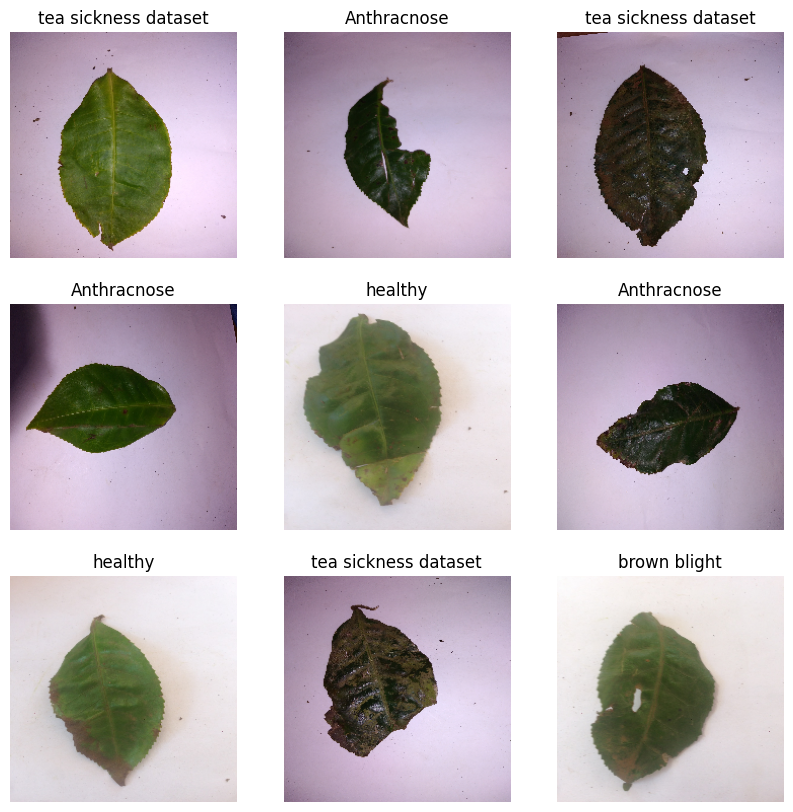

In [43]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib
## Data augmentation layers to increase data variation for training
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [37]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [40]:
base_learning_rate = 0.005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1
)

Epoch 1/15


6/6 [==============================] - 29s 5s/step - loss: 2.2337 - accuracy: 0.1667 - val_loss: 15.2936 - val_accuracy: 0.0960
Epoch 2/15
6/6 [==============================] - 25s 4s/step - loss: 2.0780 - accuracy: 0.2147 - val_loss: 2.2853 - val_accuracy: 0.1864
Epoch 3/15
6/6 [==============================] - 29s 5s/step - loss: 1.9368 - accuracy: 0.2754 - val_loss: 3.0420 - val_accuracy: 0.1130
Epoch 4/15
6/6 [==============================] - 26s 4s/step - loss: 1.8507 - accuracy: 0.2528 - val_loss: 1.8842 - val_accuracy: 0.2034
Epoch 5/15
6/6 [==============================] - 24s 4s/step - loss: 1.7610 - accuracy: 0.2641 - val_loss: 3.4732 - val_accuracy: 0.2712
Epoch 6/15
6/6 [==============================] - 25s 4s/step - loss: 1.6841 - accuracy: 0.3051 - val_loss: 2.0798 - val_accuracy: 0.2147
Epoch 7/15
6/6 [==============================] - 29s 5s/step - loss: 1.5518 - accuracy: 0.3757 - val_loss: 1.8902 - val_accuracy: 0.1751
Epoch 8/15
6/6 [============================

Predictions:
 [6 6 1 6 2 6 7 6 6 1 7 6 6 6 1 6 1 6 6 1 6 1 6 6 6 7 6 6 1 7 6 5 6 1 6 7 6
 6 7 7 6 6 6 7 1 3 6 6 6 6 6 7 6 7 7 6 6 6 5 1 6 1 1 7 6 6 7 6 6 2 6 6 6 7
 7 6 6 6 7 1 2 6 6 7 7 6 6 7 6 1 7 2 5 6 7 6 1 6 6 6 7 6 1 6 7 6 6 6 5 6 5
 5 6 6 6 6 7 6 6 2 6 1 6 6 1 6 6 7]
Labels:
 [3 7 2 7 0 7 2 1 1 4 0 7 7 6 0 1 2 3 3 4 3 0 6 3 7 4 1 1 0 4 7 5 3 0 6 4 3
 7 4 4 7 7 6 2 0 4 6 3 1 3 6 2 7 4 4 3 7 1 5 0 6 4 0 4 1 6 4 6 3 5 3 7 3 2
 2 7 1 3 2 0 4 6 6 0 0 1 1 4 7 0 0 4 5 3 2 6 4 7 7 3 2 6 0 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 3 0 4 7 3 0]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        20
           5       1.00      0.86      0.92         7
           6       0.21      1.00      0.34        15
           7       0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

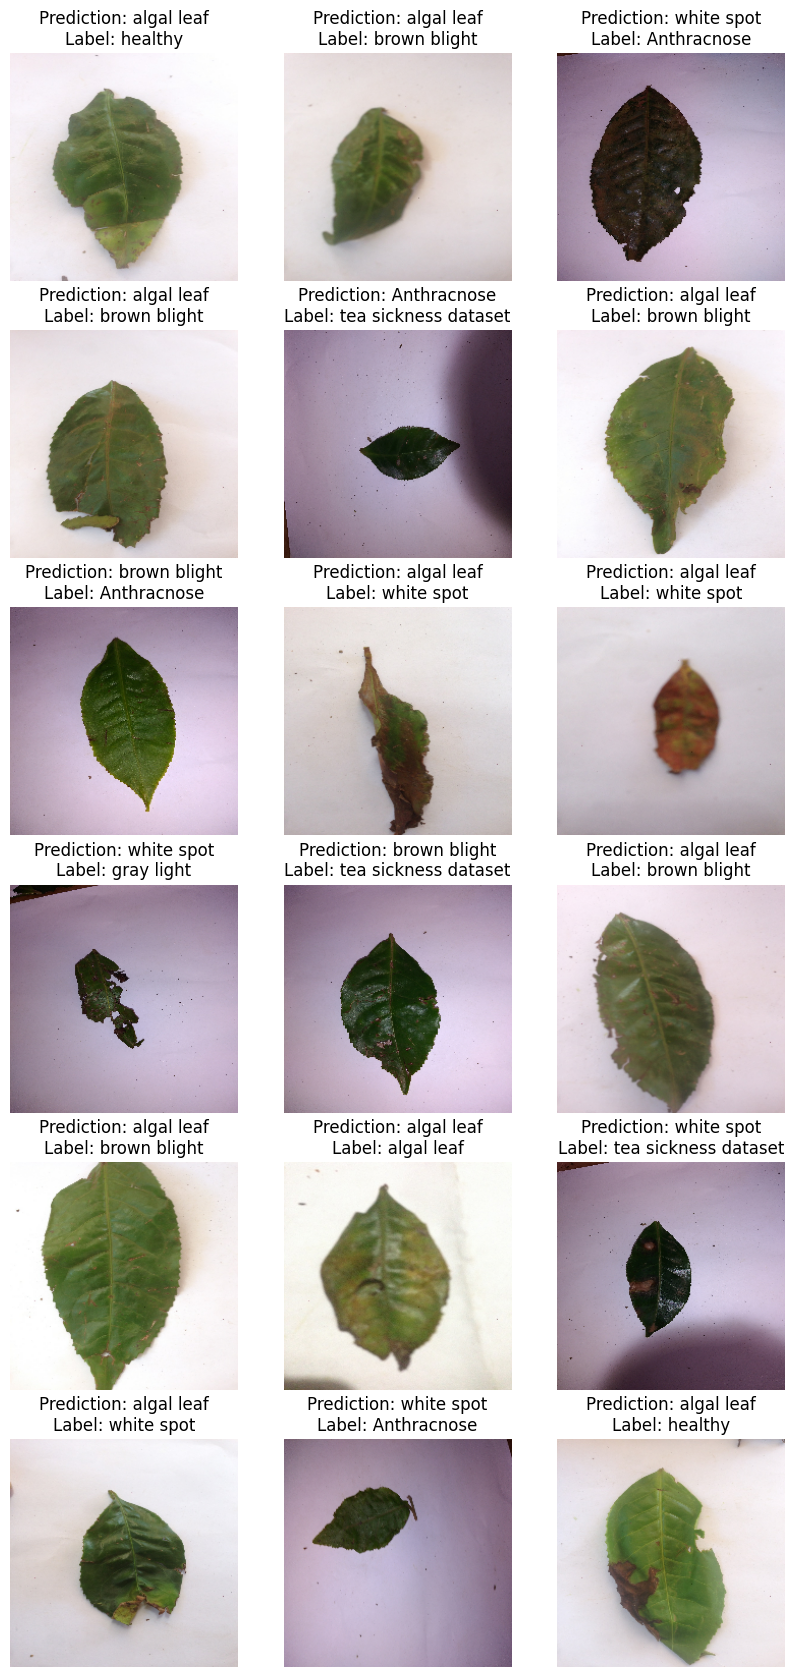

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

# Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

class_predictions = []
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)

class_predictions = np.array(class_predictions)
print('Predictions:\n', class_predictions)
print('Labels:\n', label_batch)
print()
print(classification_report(label_batch, class_predictions))

plt.figure(figsize=(10, 21))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction: "+class_names[class_predictions[i]]+"\nLabel: "+class_names[label_batch[i]])
    plt.axis("off")

1/1 [==============================] - 0s 52ms/step


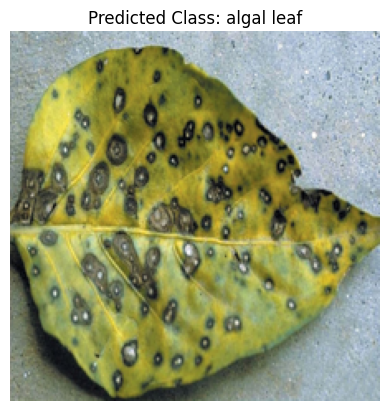

In [115]:
from PIL import Image
import numpy as np

# Load and preprocess the external image
external_image_path = '/content/ttty.jpeg'
external_image = Image.open(external_image_path).resize((224, 224))

# Convert the image to a NumPy array
external_image_array = np.array(external_image)
external_image_array = np.expand_dims(external_image_array, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(external_image_array)

# Convert predicted probabilities to class label
predicted_class = np.argmax(predictions[0])

# Display the external image with the predicted class
plt.imshow(external_image)
plt.title(f"Predicted Class: {class_names[predicted_class]}")
plt.axis("off")
plt.show()


In [34]:
import pickle

# Assuming 'model' is your trained model
# Save the model to a file using pickle
model_filename = 'model2.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

# Print a message indicating successful export
print(f"Model has been exported to {model_filename}")


Model has been exported to model2.pkl
